In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [13]:
df = pd.read_csv('/Users/kirtisailinaidu/Downloads/XGBM & LGBM/Titanic_train.csv')

In [14]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [15]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


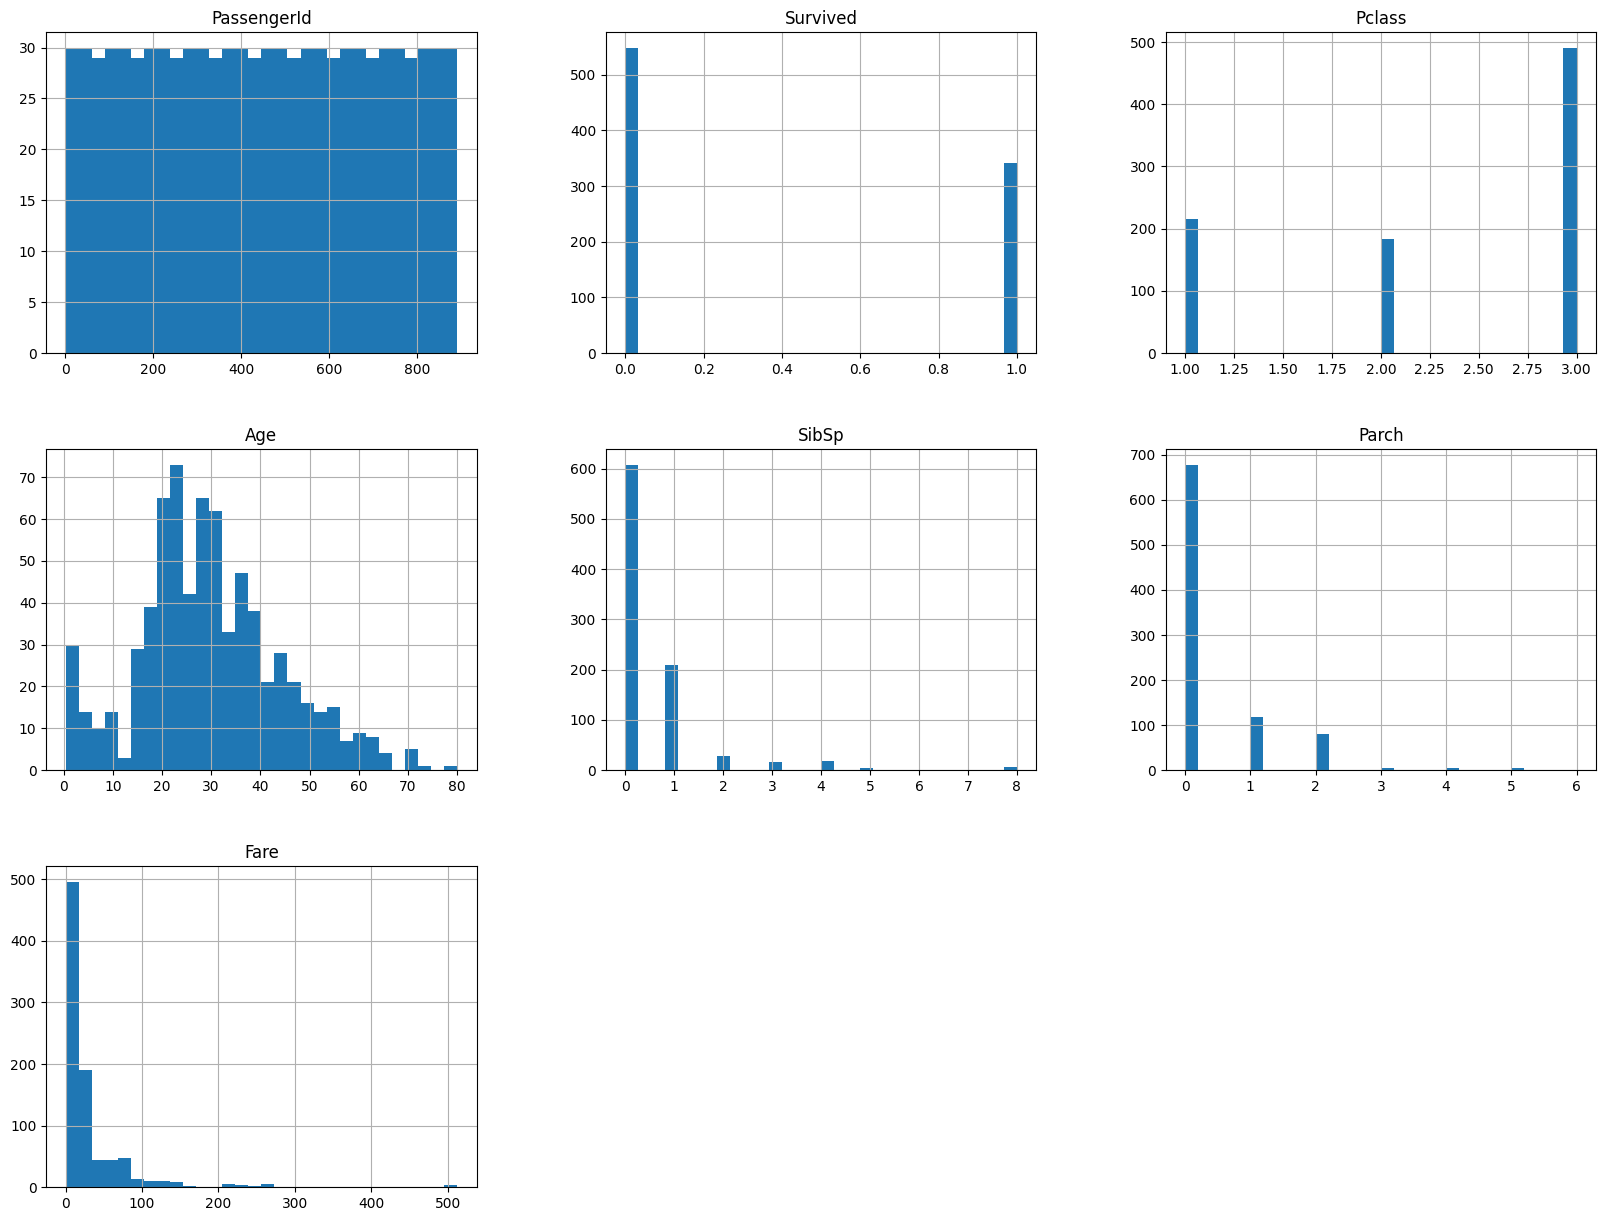

In [16]:
df.hist(bins=30, figsize=(20, 15))
plt.show()

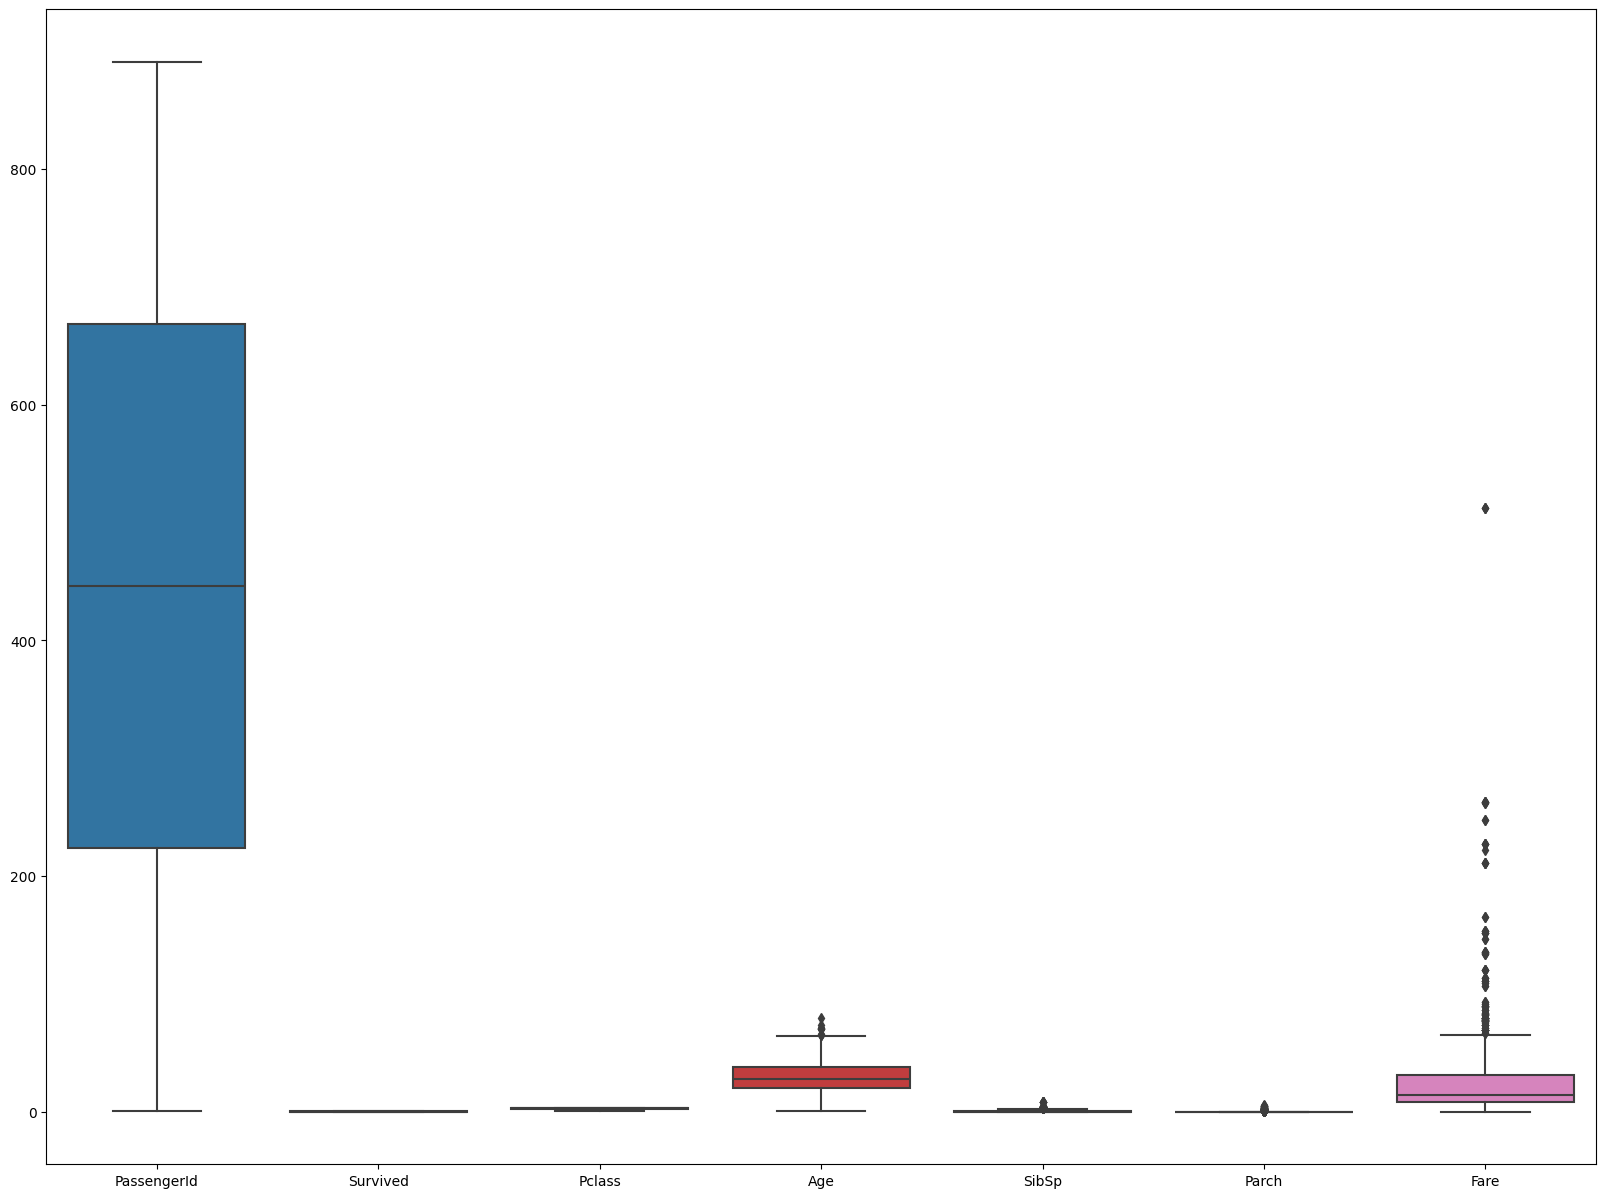

In [17]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.show()

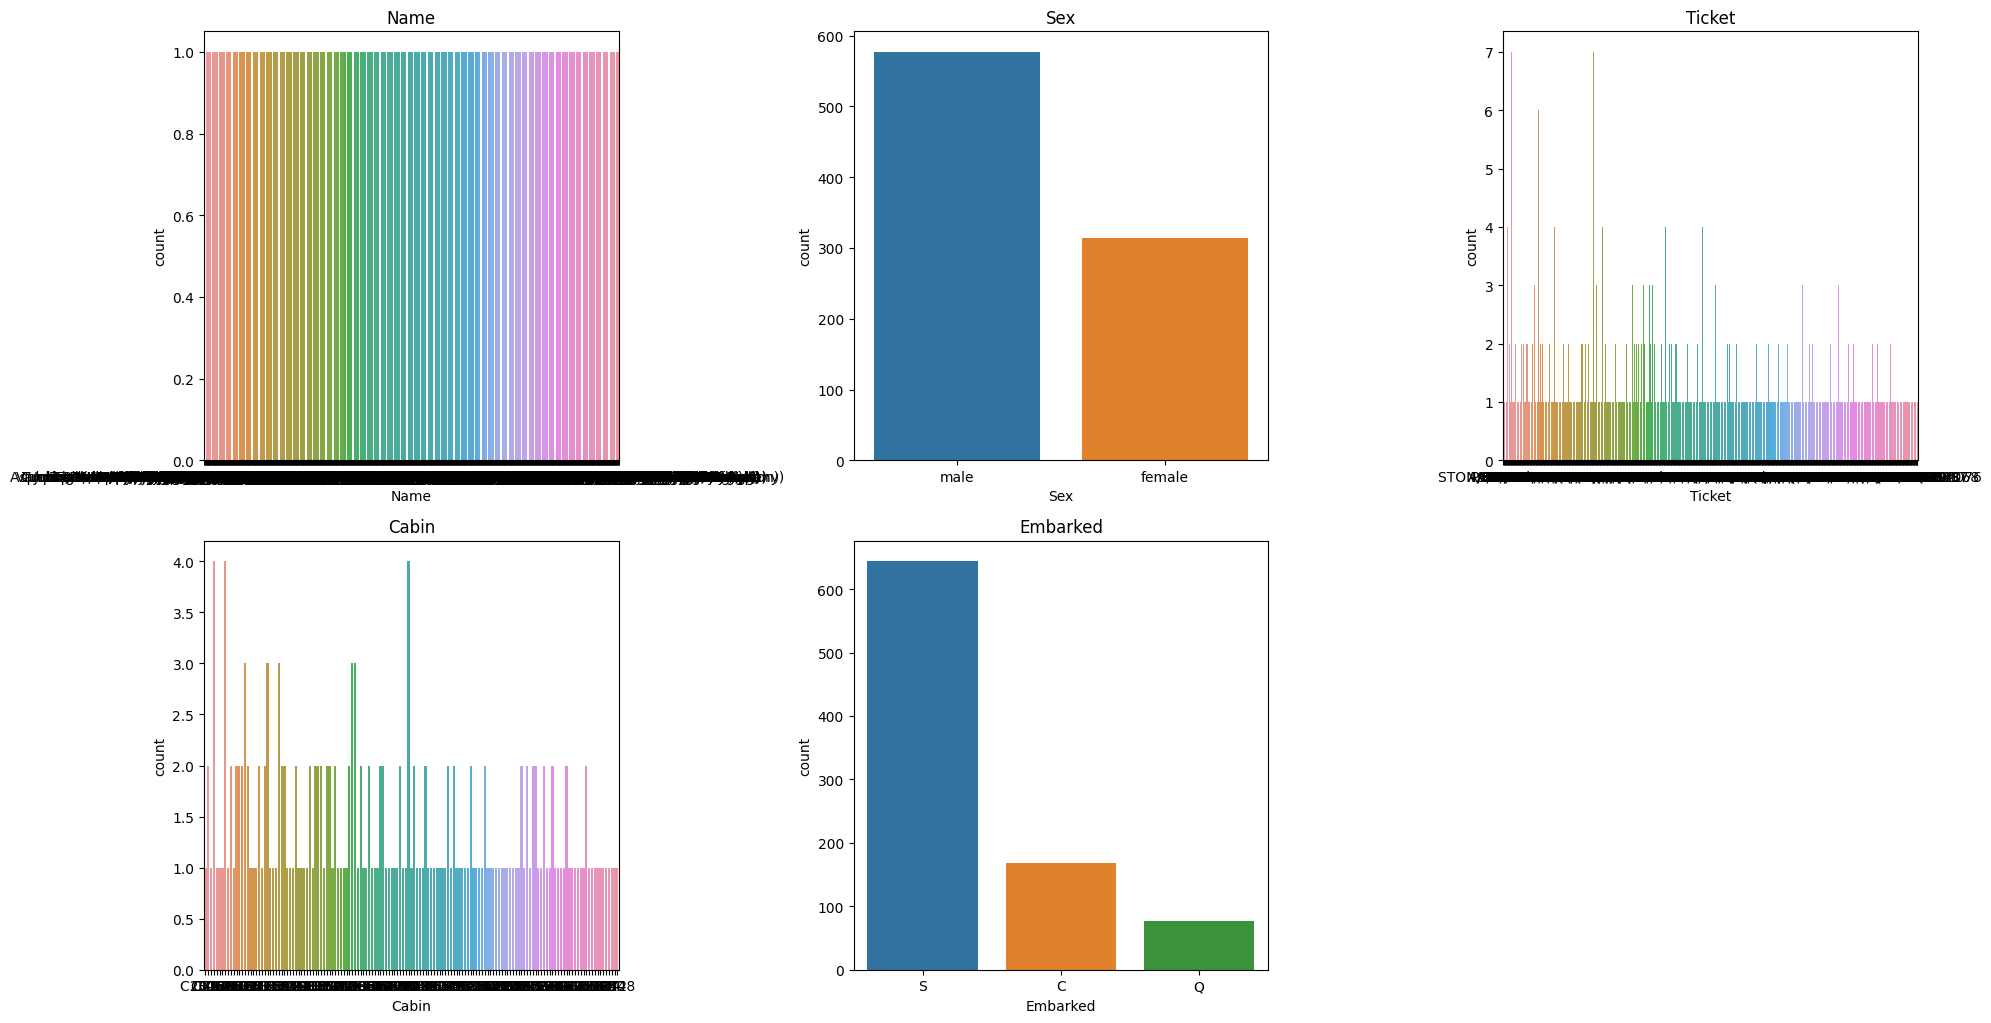

In [18]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.select_dtypes(include=[object]).columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

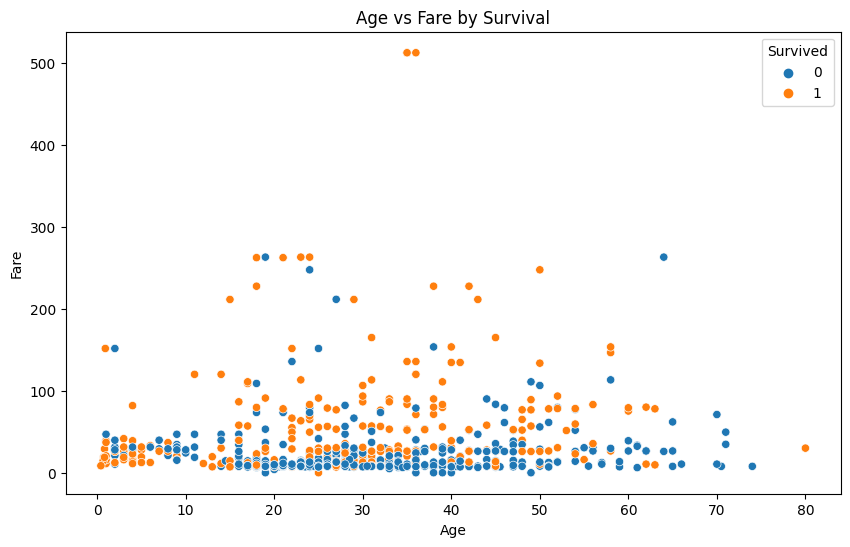

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Age vs Fare by Survival')
plt.show()

In [20]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

/var/folders/p0/vrfqq_vd7qs5cnv6g_1n5vnw0000gn/T/ipykernel_1314/2256237120.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/p0/vrfqq_vd7qs5cnv6g_1n5vnw0000gn/T/ipykernel_1314/2256237120.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [21]:
df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

In [22]:
df = pd.get_dummies(df, drop_first=True)

In [23]:
X = df.drop(columns='Survived')
y = df['Survived']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [34]:
import lightgbm as lgb
import xgboost as xgb

In [35]:
# LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_accuracy, lgb_precision, lgb_recall, lgb_f1 = evaluate_model(lgb_model, X_test, y_test)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [36]:
# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = evaluate_model(xgb_model, X_test, y_test)

In [37]:
results = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [lgb_accuracy, xgb_accuracy],
    'Precision': [lgb_precision, xgb_precision],
    'Recall': [lgb_recall, xgb_recall],
    'F1 Score': [lgb_f1, xgb_f1]
})

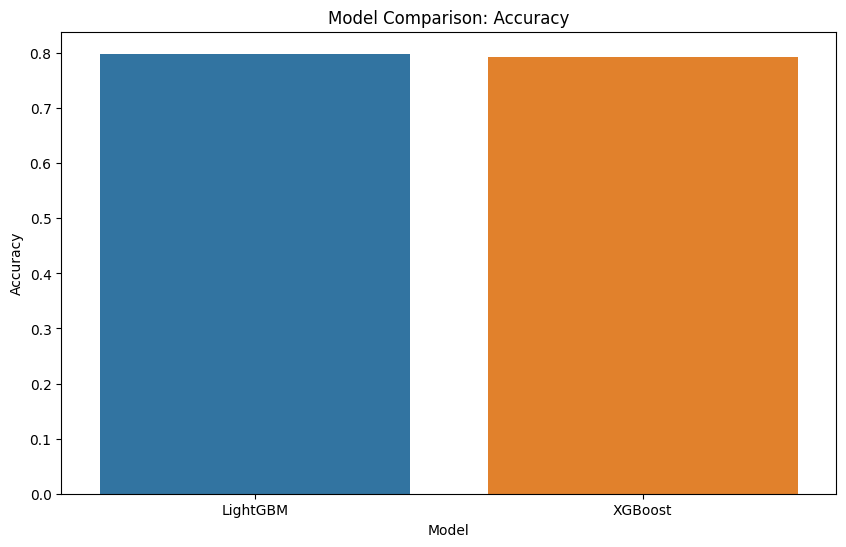

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results)
plt.title('Model Comparison: Accuracy')
plt.show()

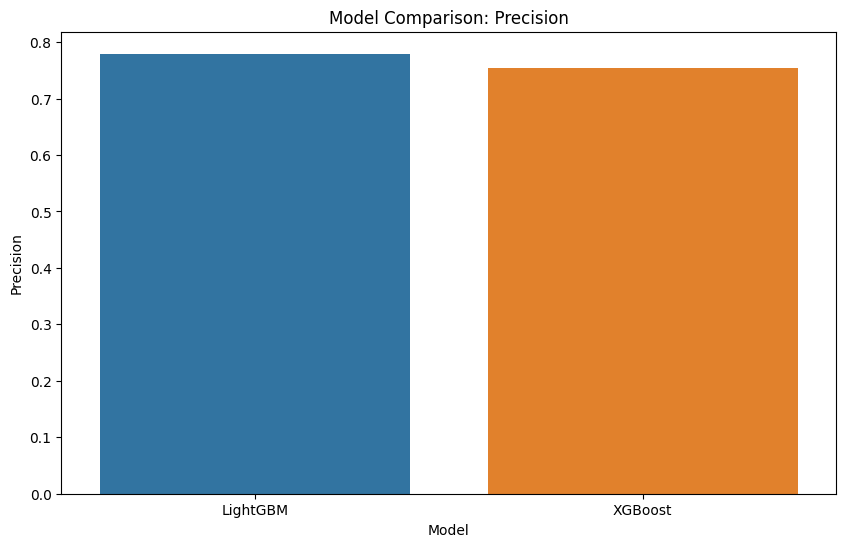

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision', data=results)
plt.title('Model Comparison: Precision')
plt.show()

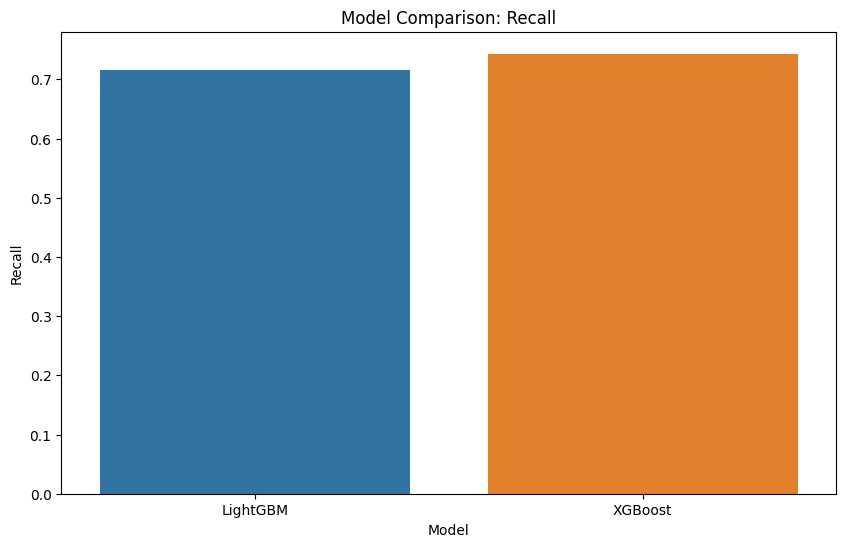

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', data=results)
plt.title('Model Comparison: Recall')
plt.show()

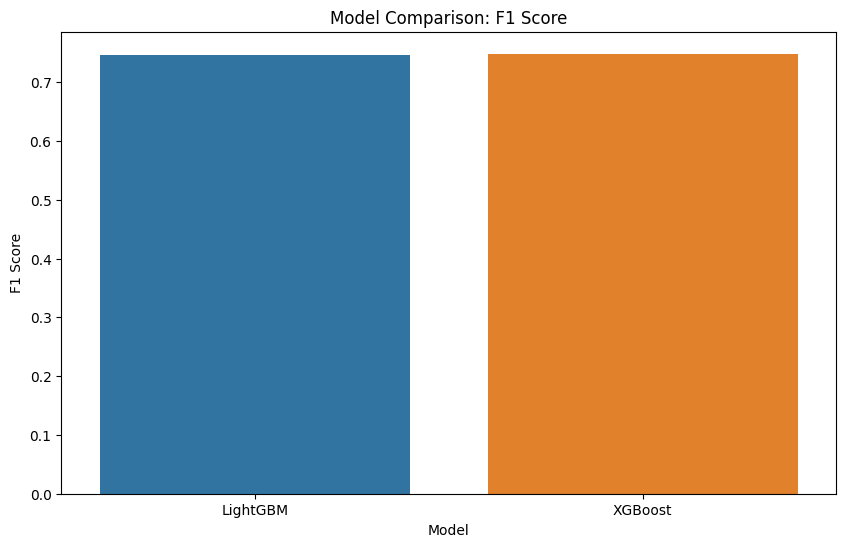

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=results)
plt.title('Model Comparison: F1 Score')
plt.show()

In [42]:
# Print the results
print("LightGBM Performance:")
print(f"Accuracy: {lgb_accuracy:.4f}")
print(f"Precision: {lgb_precision:.4f}")
print(f"Recall: {lgb_recall:.4f}")
print(f"F1 Score: {lgb_f1:.4f}")

print("\nXGBoost Performance:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1 Score: {xgb_f1:.4f}")

LightGBM Performance:
Accuracy: 0.7989
Precision: 0.7794
Recall: 0.7162
F1 Score: 0.7465

XGBoost Performance:
Accuracy: 0.7933
Precision: 0.7534
Recall: 0.7432
F1 Score: 0.7483


In [43]:
# Summary Report
summary = f"""
Summary of Comparative Analysis:
- LightGBM Model:
  - Accuracy: {lgb_accuracy:.4f}
  - Precision: {lgb_precision:.4f}
  - Recall: {lgb_recall:.4f}
  - F1 Score: {lgb_f1:.4f}

- XGBoost Model:
  - Accuracy: {xgb_accuracy:.4f}
  - Precision: {xgb_precision:.4f}
  - Recall: {xgb_recall:.4f}
  - F1 Score: {xgb_f1:.4f}

Practical Implications:
Based on the comparative analysis, both LightGBM and XGBoost provide robust performance on the Titanic dataset. However, specific use cases and constraints such as computational efficiency, interpretability, and training time may guide the choice between these two algorithms.
"""

In [44]:
print(summary)


Summary of Comparative Analysis:
- LightGBM Model:
  - Accuracy: 0.7989
  - Precision: 0.7794
  - Recall: 0.7162
  - F1 Score: 0.7465

- XGBoost Model:
  - Accuracy: 0.7933
  - Precision: 0.7534
  - Recall: 0.7432
  - F1 Score: 0.7483

Practical Implications:
Based on the comparative analysis, both LightGBM and XGBoost provide robust performance on the Titanic dataset. However, specific use cases and constraints such as computational efficiency, interpretability, and training time may guide the choice between these two algorithms.

